# Data Wrangling and Visualization

In [1]:
import pandas as pd

## Reproducible Environment

### Command `pip freeze` dan `conda env export` sama-sama digunakan untuk exporting requirements, namun apa perbedaannya ?

Command [`pip freeze`](https://pip.pypa.io/en/stable/reference/pip_freeze/) digunakan hanya untuk export list **dependencies** (yaitu daftar packages beserta versinya), sedangkan [`conda env export`](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#exporting-an-environment-file-across-platforms) tidak hanya dependencies melainkan juga detail lain mengenai environment tersebut seperti **name**, **channels**, dan juga **prefix**.

Saat import requirements dari hasil `pip freeze`, kita harus mempersiapkan environment kosong terlebih dahulu dengan `conda create`. Ketika import requirements dari hasil `conda env export`, kita tidak perlu membuat environment kosong dari awal.

Contoh hasil `pip freeze`:

    docutils==0.11
    Jinja2==2.7.2
    MarkupSafe==0.19
    Pygments==1.6
    Sphinx==1.2.2
    
Contoh hasil `conda env export`:

    name: env-name
    channels:
      - conda-forge
      - defaults
    dependencies:
      - python=3.7
      - codecov
    prefix: /Users/username/anaconda3/envs/env-name

### Apakah nama file hasil export harus `requirements.txt` atau `environment.yml`?

Tidak harus, file bisa dinamakan sebagai apa saja. Namun, sebagai **konvensi atau standar penamaan** biasa digunakan `requirements.txt` (untuk hasil `pip freeze`) ataupun `environment.yml` (untuk hasil `conda env export`).

### Saat melakukan importing requirements, apakah perlu memastikan versi Python-nya juga sama?

Ketika environment di-export menggunakan `pip freeze`, pihak yang menerima requirements harus memastikan bahwa saat `conda create` mencantumkan versi Python yang sesuai dengan sumber. Apabila environment di-export dengan `conda env export`, maka tidak perlu dikarenakan versi Python sudah disertakan pada list dependencies.

## Data Loading

### Mengapa muncul peringatan `FutureWarning: pandas.util.testing is deprecated` saat load library `pandas_datareader`?

<img src="assets/DWV/pandas-datareader-deprecated.png" width="75%">

Warning tersebut dapat diabaikan, library tetap dapat digunakan dengan baik. Warning muncul karena terdapat perbedaan versi pandas di local (laptop masing-masing) dengan versi pandas yang digunakan pada `pandas_datareader`.

### Apa itu file pickle?

Object apapun pada Python dapat disimpan menjadi sebuah file bernama **pickle**, dengan cara "mengawetkan" bentuk dari object tersebut menjadi binary (byte stream). Dikenal dua istilah:
1. Pickling atau Serializing: **menyimpan** objek Python **ke** sebuah file binary. Misalkan menyimpan DataFrame dengan method `df.to_pickle()`
2. Unpickling atau De-serializing: **membaca** objek Python **dari** sebuah file binary. Misalkan membaca DataFrame dari pickle dengan method `pd.read_pickle()`

### Apa keunggulan menggunakan file pickle untuk menyimpan DataFrame dibandingkan csv?

Dengan menggunakan file pickle, maka segala informasi di dalam sebuah DataFrame akan "diawetkan". Misalkan pada file pickle pada `data_input/stock` dapat menjaga bentuk dari MultiIndex DataFrame:

In [2]:
stock = pd.read_pickle('data_input/stock')
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961

Sedangkan ketika kita save `stock` ke sebuah file csv kemudian membacanya lagi, tabel tidak dibaca sebagai MultiIndex lagi, namun hanya DataFrame biasa.

In [3]:
stock.to_csv('data_input/stock.csv')
stock_csv = pd.read_csv('data_input/stock.csv')
stock_csv.head()

,Attributes,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Close,Close.1,Close.2,Volume,Volume.1,Volume.2,Adj Close,Adj Close.1,Adj Close.2
0,Symbols,AAPL,FB,GOOGL,AAPL,FB,GOOGL,AAPL,FB,GOOGL,AAPL,FB,GOOGL,AAPL,FB,GOOGL,AAPL,FB,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,172.3000030517578,181.5800018310547,1075.97998046875,169.25999450683594,177.5500030517578,1053.02001953125,170.16000366210938,177.67999267578125,1053.02001953125,172.25999450683594,181.4199981689453,1073.2099609375,25555900.0,18151900.0,1588300.0,168.98731994628906,181.4199981689453,1073.2099609375
3,2018-01-03,174.5500030517578,184.77999877929688,1096.0999755859375,171.9600067138672,181.3300018310547,1073.4300537109375,172.52999877929688,181.8800048828125,1073.9300537109375,172.22999572753906,184.6699981689453,1091.52001953125,29517900.0,16886600.0,1565900.0,168.9578857421875,184.6699981689453,1091.52001953125
4,2018-01-04,173.47000122070312,186.2100067138672,1104.0799560546875,172.0800018310547,184.10000610351562,1094.260009765625,172.5399932861328,184.89999389648438,1097.0899658203125,173.02999877929688,184.3300018310547,1095.760009765625,22434600.0,13880900.0,1302600.0,169.74270629882812,184.3300018310547,1095.760009765625


Kita bisa saja menggunakan parameter `index_col` dan `header` agar `stock_csv` menjadi MultiIndex. Namun cara seperti ini **kurang praktis** apabila dibandingkan dengan menggunakan file pickle secara langsung.

In [4]:
stock_csv_multi = pd.read_csv('data_input/stock.csv', index_col=0, header=[0, 1])
stock_csv_multi.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961

### Apakah pickle dapat dibaca oleh bahasa pemrograman lain?

File pickle hanya dapat dibuat dan dibaca oleh Python, sehingga tidak memungkinkan untuk transfer informasi lintas bahasa pemrograman ataupun aplikasi. Berikut adalah contoh file pickle apabila dibuka menggunakan text editor: 

<img src="assets/DWV/pickle-text-editor.png" width="75%">

Pada bahasa pemrograman R, dikenal konsep pickling yang serupa yaitu dengan menggunakan file RDS.

## Data Wrangling and Reshaping

### Method `.xs()` dengan operator slicing `[]` digunakan untuk mengambil kolom, namun apa perbedaannya?

Method `.xs()` atau cross-section digunakan untuk mengambil kolom tertentu yang letaknya **tidak pada level terluar** (pada MultiIndex DataFrame), sedangkan operator `[]` hanya dapat mengambil kolom pada **level terluar**.

In [5]:
stock = pd.read_pickle('data_input/stock')
stock.head()

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961

Contoh: ingin mengambil kolom `'High'` pada level `'Attributes'` (terluar). Perhatikan bahwa code berikut ekuivalen:

In [6]:
high_slicing = stock['High']
high_xs = stock.xs(key='High', level='Attributes', axis=1)

high_slicing.equals(high_xs)

True

Contoh: ingin mengambil kolom `AAPL` pada level `Symbols`, maka kita tidak dapat menggunakan `[]`, melainkan harus menggunakan `.xs()`

In [7]:
# stock['AAPL'] # KeyError: 'AAPL'
stock.xs(key='AAPL', level='Symbols', axis=1).head()

Attributes,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,168.987320
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,168.957886
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,169.742706
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,171.675278
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,171.037628


### Kapan kita membutuhkan `.reset_index()`?

Ketika method `.reset_index()` diaplikasikan ke sebuah DataFrame, maka index akan menjadi sebuah kolom baru. Maka method ini digunakan apabila kita diharuskan mengakses index sebagai sebuah **nama kolom**.

In [8]:
# stock['Date'] # KeyError: 'Date'
stock.reset_index()['Date']

0     2018-01-02
1     2018-01-03
2     2018-01-04
3     2018-01-05
4     2018-01-08
         ...    
324   2019-04-17
325   2019-04-18
326   2019-04-22
327   2019-04-23
328   2019-04-24
Name: Date, Length: 329, dtype: datetime64[ns]

Contohnya pada method `.melt()`, parameter `id_vars` dan `value_vars` mengharuskan kita untuk menspesifikan nama kolom yang dapat diakses.

In [9]:
# stock.melt(id_vars=['Date']) # KeyError: "The following 'id_vars' are not present in the DataFrame: ['Date']"
stock_melt = stock.reset_index().melt(id_vars=['Date'])
stock_melt

,Date,Attributes,Symbols,value
0,2018-01-02,High,AAPL,172.300003
1,2018-01-03,High,AAPL,174.550003
2,2018-01-04,High,AAPL,173.470001
3,2018-01-05,High,AAPL,175.369995
4,2018-01-08,High,AAPL,175.610001
...,...,...,...,...
5917,2019-04-17,Adj Close,GOOGL,1240.140015
5918,2019-04-18,Adj Close,GOOGL,1241.469971
5919,2019-04-22,Adj Close,GOOGL,1253.760010
5920,2019-04-23,Adj Close,GOOGL,1270.589966


### Method `.melt()` dapat mengubah DataFrame dari wide ke long, adakah operasi sebaliknya yaitu mengubah DataFrame dari long ke wide?

Kebalikan dari method `.melt()` adalah `.pivot()`, yaitu mengubah bentuk DataFrame dari long ke wide. Sebagai contoh, mari gunakan objek `stock_melt` dari nomor sebelumnya:

In [10]:
stock_melt.pivot(index='Date',
                 columns=['Attributes', 'Symbols'],
                 values='value')

Attributes        High                                  Low              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  172.300003  181.580002  1075.979980  169.259995  177.550003   
2018-01-03  174.550003  184.779999  1096.099976  171.960007  181.330002   
2018-01-04  173.470001  186.210007  1104.079956  172.080002  184.100006   
2018-01-05  175.369995  186.899994  1113.579956  173.050003  184.929993   
2018-01-08  175.610001  188.899994  1119.160034  173.929993  186.330002   
...                ...         ...          ...         ...         ...   
2019-04-17  203.380005  180.740005  1245.099976  198.610001  178.360001   
2019-04-18  204.149994  178.880005  1245.939941  202.520004  177.339996   
2019-04-22  204.940002  181.669998  1254.339966  202.339996  178.250000   
2019-04-23  207.750000  184.220001  1274.430054  203.899994  181.479996   
2019-04-24  208.479996  185.139999  1274.000000  207.050003  181.649994   

Attributes                     Open                                Close  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1053.020020  170.160004  177.679993  1053.020020  172.259995   
2018-01-03  1073.430054  172.529999  181.880005  1073.930054  172.229996   
2018-01-04  1094.260010  172.539993  184.899994  1097.089966  173.029999   
2018-01-05  1101.800049  173.440002  185.589996  1103.449951  175.000000   
2018-01-08  1110.000000  174.350006  187.199997  1111.000000  174.350006   
...                 ...         ...         ...          ...         ...   
2019-04-17  1232.900024  199.539993  179.600006  1237.000000  203.130005   
2019-04-18  1239.410034  203.119995  178.800003  1245.000000  203.860001   
2019-04-22  1233.369995  202.830002  178.250000  1236.670044  204.529999   
2019-04-23  1251.969971  204.429993  182.740005  1256.640015  207.479996   
2019-04-24  1259.810059  207.360001  184.490005  1270.589966  207.160004   

Attributes                               Volume                         \
Symbols             FB        GOOGL        AAPL          FB      GOOGL   
Date                                                                     
2018-01-02  181.419998  1073.209961  25555900.0  18151900.0  1588300.0   
2018-01-03  184.669998  1091.520020  29517900.0  16886600.0  1565900.0   
2018-01-04  184.330002  1095.760010  22434600.0  13880900.0  1302600.0   
2018-01-05  186.850006  1110.290039  23660000.0  13574500.0  1512500.0   
2018-01-08  188.279999  1114.209961  20567800.0  17994700.0  1232200.0   
...                ...          ...         ...         ...        ...   
2019-04-17  178.779999  1240.140015  28906800.0   9973700.0  1518300.0   
2019-04-18  178.279999  1241.469971  24195800.0  11655600.0  1237500.0   
2019-04-22  181.440002  1253.760010  19439500.0  13389900.0   954200.0   
2019-04-23  183.779999  1270.589966  23323000.0  19954800.0  1593400.0   
2019-04-24  182.580002  1260.050049  17540600.0  37289900.0  1169800.0   

Attributes   Adj Close                           
Symbols           AAPL          FB        GOOGL  
Date                                             
2018-01-02  168.987320  181.419998  1073.209961  
2018-01-03  168.957886  184.669998  1091.520020  
2018-01-04  169.742706  184.330002  1095.760010  
2018-01-05  171.675278  186.850006  1110.290039  
2018-01-08  171.037628  188.279999  1114.209961  
...                ...         ...          ...  
2019-04-17  203.130005  178.779999  1240.140015  
2019-04-18  203.860001  178.279999  1241.469971  
2019-04-22  204.529999  181.440002  1253.760010  
2019-04-23  207.479996  183.779999  1270.589966  
2019-04-24  207.160004  182.580002  1260.050049  

[329 rows x 18 columns]

### Apa perbedaan `.pivot()` dengan `.pivot_table()`?

- `.pivot()` digunakan untuk **reshaping**, dan mengekspektasi semua baris memiliki nilai yang unique. Dalam kasus ini `Date`, `Attributes`, dan `Symbols` pada `stock_melt` tidak ada yang duplicate.
- `.pivot_table()` digunakan untuk **aggregation**, sehingga terdapat parameter `aggfunc` untuk menggabungkan nilai dari baris yang duplicate.

In [11]:
# Cek apakah ada baris yang duplicated?
stock_melt[['Date', 'Attributes', 'Symbols']].duplicated().any()

False

### Bagaimana menggabungkan nilai dari beberapa baris menjadi sebuah list?

Contoh kasus: kolom `Nilai` pada DataFrame `nama_nilai` akan kita gabung menjadi sebuah list berdasarkan masing-masing `Nama`.

In [12]:
nama_nilai = pd.DataFrame({'Nama': ['A', 'A', 'A', 'B', 'B', 'C', 'A'],
                           'Nilai': [1, 5, 3, 4, 2, 5, 2]})
nama_nilai

,Nama,Nilai
0,A,1
1,A,5
2,A,3
3,B,4
4,B,2
5,C,5
6,A,2


Untuk itu, bisa digunakan fungsi `groupby()` yang dilanjutkan dengan fungsi custom aggregate yaitu `.agg()`:

In [13]:
nama_nilai.groupby('Nama').agg({
    'Nilai': lambda x: list(sorted(x))
})

,Nilai
Nama,
A,"[1, 2, 3, 5]"
B,"[2, 4]"
C,[5]


## Visualization

### Mengapa perlu dilakukan `import matplotlib` saat melakukan visualisasi melalui `pandas`?

Dalam melakukan visualisasi data menggunakan method `.plot()`, library `pandas` menggunakan fungsi-fungsi yang terdapat pada `matplotlib`. Jadi meskipun kita tidak menggunakan matplotlib secara eksplisit, namun bergantung pada implementasi `.plot()`, kita tetap harus melakukan `import matplotlib.pyplot as plt` agar plot yang dibuat dapat tampil.

In [14]:
import matplotlib.pyplot as plt

Kita dapat sebut bahwa `matplotlib` adalah salah satu dependencies dari library `pandas`, artinya ketika kita menginstall `pandas` maka library `matplotlib` otomatis ter-install juga karena kebutuhan `pandas` dalam melakukan visualisasi. Kita dapat cek list dependencies dengan `pd.show_versions()`:

In [15]:
#pd.show_versions()

### Mengapa kita tidak belajar menggunakan `matplotlib` dari dasar, namun hanya menggunakan `.plot()`?

Method `.plot()` sudah mempermudah kita dalam melakukan visualisasi langsung pada DataFrame, tanpa perlu mengerti cara penggunaan matplotlib. Hanya dengan 2 baris code di bawah ini, kita sudah dapat membuat sebuah visualisasi line plot:

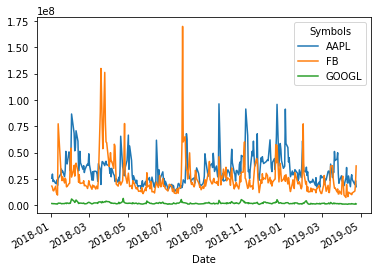

In [16]:
stock['Volume'].plot()
plt.show()

Coba bandingkan ketika kita replikasi plot di atas menggunakan fungsi yang ada di base `matplotlib`, maka akan membutuhkan code yang lebih panjang seperti berikut:

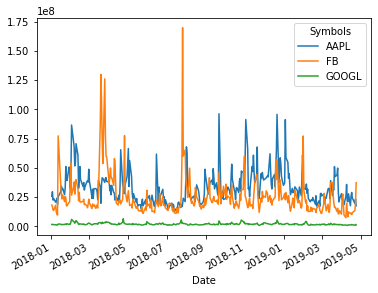

In [17]:
data = stock['Volume']
for col in data.columns:
    plt.plot(data[col], label=col)      # secara iteratif plot 1 garis
plt.xticks(rotation=30, ha='right')     # mengatur label ticks sumbu x
plt.xlabel(data.index.name)             # mengubah label sumbu x
plt.legend(title=data.columns.names[0]) # menambahkan judul legenda
plt.show()

Namun, dengan menggunakan `.plot()` tidak banyak elemen yang dapat dikustomisasi. Biasanya kita mengombinasikannya juga dengan fungsi pada `matplotlib` juga agar semua elemen pada visualisasi dapat dikustomisasi. 

Kunjungi: [Matplotlib 3.2.2 Official Documentation](https://matplotlib.org/3.2.2/tutorials/index.html)

### Bagaimana cara menentukan jenis visualisasi yang tepat?

Jenis visualisasi dapat ditentukan berdasarkan tujuan visualisasi, yang secara umum dapat dibagi menjadi empat:
1. Comparison: membandingkan nilai
2. Distribution: mengetahui persebaran data
3. Composition: melihat komposisi data
4. Relationship: mengidentifikasi hubungan antara dua atau lebih variabel

<img src="assets/DWV/chart-suggestions.jpg" width="60%">

Selain itu, tipe visualisasi juga dapat ditentukan berdasarkan tipe data yang dimiliki. Silahkan kunjungi https://www.data-to-viz.com/ untuk panduan yang lebih lengkap, interaktif, dan disertai dengan contoh code.

### Bagaimana cara membaca sebuah boxplot?

Boxplot menggambarkan **five number summary** dari sebuah data:

<img src="assets/DWV/boxplot.png" width="60%">

Keterangan:
- "minimum" (lower whisker/pagar bawah), sebagai batas bawah dalam menentukan nilai outlier
- Q1 (kuartil 1), sebagai nilai ke 25% percentile
- Q2 (kuartil 2), sebagai nilai ke 50% percentile atau median
- Q3 (kuartil 3), sebagai nilai ke 75% percentile
- "maximum" (upper whisker/pagar atas), sebagai batas atas dalam menentukan nilai outlier
- Titik-titik diluar lower dan upper whisker disebut sebagai outlier

**Catatan penting:** Nilai "minimum" **bukan** nilai terkecil di data kita, begitupula nilai "maximum" **bukan** nilai terbesar di data kita.

Insight yang dapat diperoleh dari boxplot:
- Dari median, kita dapat membandingkan kategori mana yang memiliki nilai overall yang terbesar.
- Dari lebar kotak (atau IQR, selisih Q3 dengan Q1), kita dapat mengetahui persebaran data. Semakin lebar kotaknya, data semakin beragam.
- Dari outlier, kita dapat mengetahui kategori mana yang memiliki nilai ekstrim.

### Bagaimana cara mengekstrak nilai statistik dari boxplot?

Misal kita akan mengekstrak nilai statistik dari boxplot `stock['Volume']` berikut:

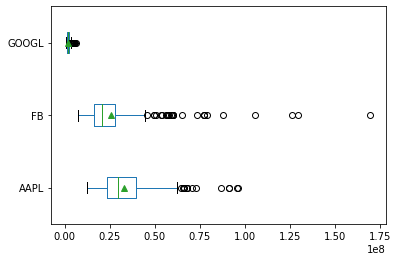

In [18]:
stock['Volume'].plot(kind='box', showmeans=True, vert=False)
plt.show()

Dengan menggunakan method `boxplot_stats` dari `matplotlib.cbook`, nilai statistik berikut dapat diperoleh:
- `mean`: rata-rata
- `iqr`: interquartile range, selisih q3 dengan q1
- `cilo`: bawah bawah confidence interval dari median
- `cihi`: bawah atas confidence interval dari median
- `whishi`: upper whisker atau pagar atas
- `whislo`: lower whisker atau pagar bawah
- `fliers`: list berupa nilai outliers
- `q1`: kuartil 1
- `med`: kuartil 2 atau median
- `q3`: kuartil 3

**Catatan:** `.values` mengubah DataFrame menjadi sebuah `numpy` array.

In [19]:
from matplotlib.cbook import boxplot_stats

bp_stats = pd.DataFrame(boxplot_stats(stock['Volume'].values),
                       index=stock['Volume'].columns)
bp_stats

,mean,iqr,cilo,cihi,whishi,whislo,fliers,q1,med,q3
Symbols,,,,,,,,,,
AAPL,3.309932e+07,16101200.0,2.846213e+07,3.124947e+07,62404000.0,12513900.0,"[86593800.0, 72738500.0, 68243800.0, 70672600....",23271800.0,29855800.0,39373000.0
FB,2.559525e+07,11452300.0,1.975922e+07,2.174178e+07,44613200.0,7297400.0,"[77306900.0, 54211300.0, 88140100.0, 129851800...",16292300.0,20750500.0,27744600.0
GOOGL,1.924978e+06,790700.0,1.652659e+06,1.789541e+06,3339600.0,708900.0,"[3675700.0, 5892100.0, 4177500.0, 3831500.0, 4...",1391300.0,1721100.0,2182000.0


Nilai pada kolom `fliers` adalah sebuah list, kita juga dapat mengetahui ada berapa outlier pada masing-masing `Symbols`:

In [20]:
bp_stats['fliers'].apply(len)

Symbols
AAPL     14
FB       26
GOOGL    21
Name: fliers, dtype: int64

### Bagaimana cara mengintegrasikan Python ke aplikasi visualisasi yang lain?

- Tableau: menggunakan TabPy, referensi: https://www.tableau.com/about/blog/2019/4/leverage-power-tableau-and-python-prescriptive-analytics-104906
- Menggunakan Python di dalam PowerBI: https://towardsdatascience.com/using-python-in-power-bi-ee95a6b71443

### Adakah library visualisasi data di Python selain `matplotlib`?

Tentu saja, karena Python adalah bahasa pemrograman yang bersifat open source, tidak heran jika nantinya akan ada banyak sekali library visualisasi yang dapat digunakan. Namun yang perlu diperhatikan adalah kebutuhan atau tujuan kita dalam menampilkan visualisasi tersebut, apakah hanya bersifat **statis** untuk kebutuhan report yang dicetak di atas kertas atau grafik butuh ditampilkan secara **interaktif** untuk user. Sebagai saran tambahan, kita tidak perlu menguasai semua library yang ada, cukup disesuaikan dengan kebutuhan dan dalami **satu atau dua library** yang cocok. 

Selanjutnya kita akan membahas beberapa library visualisasi yang umum digunakan pada Python selain `matplotlib` dan coba membuat replikasi dari plot sederhana berikut:

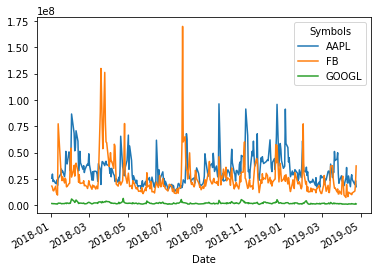

In [21]:
stock['Volume'].plot()
plt.show()

Sebelum kita memulai visualisasi, mayoritas function akan membutuhkan tipe DataFrame yang memanjang (long), sehingga kita lakukan reshaping dengan melt terhadap `stock['Volume']` terlebih dahulu:

In [22]:
volume_melt = stock['Volume'].reset_index().melt(id_vars='Date', value_name='Volume')
volume_melt.head()

,Date,Symbols,Volume
0,2018-01-02,AAPL,25555900.0
1,2018-01-03,AAPL,29517900.0
2,2018-01-04,AAPL,22434600.0
3,2018-01-05,AAPL,23660000.0
4,2018-01-08,AAPL,20567800.0


#### Seaborn

`seaborn` dibangun di atas `matplotlib` untuk membuat grafik yang indah dalam beberapa baris kode (tidak sebanyak `matplotlib`). Perbedaan utamanya adalah gaya default dan palet warna yang dirancang agar lebih estetis dan modern. Intinya `seaborn` membuat plot pada `matplotlib` yang terlihat tradisional menjadi lebih modern secara tampilan dan warna.

Kunjungi: [Seaborn Official Documentation](https://seaborn.pydata.org/introduction.html)

In [23]:
import seaborn as sns
plt.style.use('seaborn')

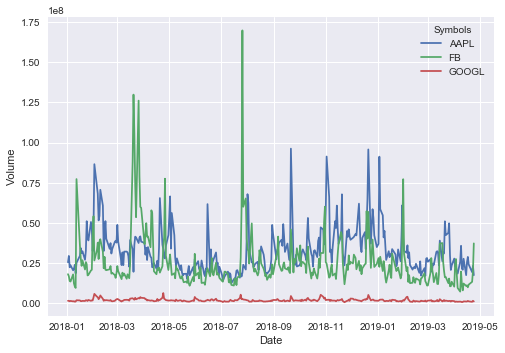

In [24]:
sns.lineplot(data=volume_melt, 
             x='Date', y='Volume', hue='Symbols')
plt.show()

#### Plotly

`plotly` adalah salah satu library yang memungkinkan kita membuat plot interaktif untuk user. Selain itu juga sangat kompatibel dengan Jupyter Notebook maupun web browser. `plotly` mendukung berbagai macam plot mulai dari tipe grafik dasar, plot seaborn (level advance), plot tiga dimensi, visualisasi berbasis peta, dan lain sebagainya.

Kunjungi: [Plotly Official Documentation](https://plotly.com/python/)

In [25]:
import plotly.express as px

In [26]:
fig = px.line(volume_melt, 
        x='Date', y='Volume', color='Symbols',
        width=750, height=500)
# fig.write_html("stock_volume_plotly.html")

[Lihat output Plotly di sini](stock_volume_plotly.html)

#### Bokeh

`bokeh` adalah library yang dirancang untuk menghasilkan visualisasi interaktif yang ramah pada antarmuka web dan browser. Jika kita ingin menampilkan visualisasi ini di browser, ada fitur yang tersedia untuk mengekspornya dan dapat digunakan melalui JavaScript.

Kunjungi: [Bokeh Official Documentation](https://docs.bokeh.org/en/latest/index.html)

In [27]:
from bokeh.plotting import figure, output_notebook, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral4

# output_notebook()                  # output tampil pada notebook
output_file("stock_volume_bokeh.html") # output berupa file html

In [28]:
# sumber data dari DataFrame
source = ColumnDataSource(stock['Volume'].reset_index())

# canvas
p = figure(x_axis_type="datetime", width=600, height=300)

# plot garis satu per satu
for sym, col in zip(stock['Volume'].columns, Spectral4):
    p.line(x='Date', y=sym, legend_label=sym,
           line_color=col, source=source,
           muted_alpha=0.1, muted_color=col)
    
# fitur mute pada legend
p.legend.click_policy = 'mute'

# tampilkan plot
# show(p)

[Lihat output Bokeh di sini](stock_volume_bokeh.html)

#### Altair

`altair` adalah library visualisasi di Python yang bersifat deklaratif. Library ini dibangun di atas Vega dan Vega-Lite, yaitu visualization grammar yang digunakan untuk membuat, menyimpan, dan berbagi visualisasi yang interaktif. Dengan Vega, visualisasi dapat dideskripsikan menggunakan format JSON dan menghasilkan tampilan web-based menggunakan Canvas atau SVG.

Kunjungi: [Altair Official Documentation](https://altair-viz.github.io/index.html)

In [29]:
import altair as alt

In [30]:
chart = alt.Chart(volume_melt).mark_line().encode(
    x='Date',
    y='Volume',
    color='Symbols',
    strokeDash='Symbols',
)
chart.save("stock_volume_altair.html")

[Lihat output Altair di sini](stock_volume_altair.html)

### Kustomisasi tambahan untuk visualisasi di `matplotlib`

Pada bagian ini, akan disajikan berbagai kustomisasi yang sering digunakan pada `matplotlib` dengan tujuan membuat visualisasi menjadi lebih apik dan indah.

#### Mengganti warna layout

Warna layout dapat diubah melalui method `plt.style.use()`. Berbagai macam style sheet sudah disediakan oleh `matplotlib`, daftarnya dapat dilihat pada `plt.style.available`.

Kunjungi: [Matplotlib Style Sheets Reference](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html)

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


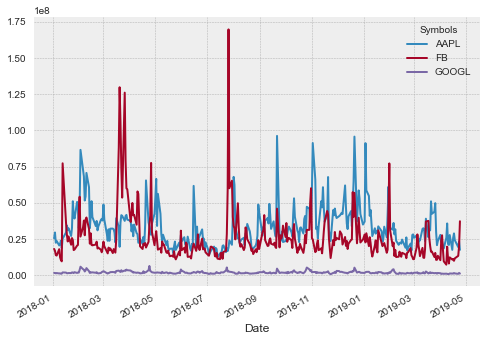

In [32]:
plt.style.use('bmh') # ubah style di sini
stock['Volume'].plot()
plt.show()

Secara default, `matplotlib` menggunakan theme `'default'`:

In [33]:
plt.style.use('default')

#### Mengubah font

Pengaturan terhadap font dapat diubah melalui `rcParams`. Lebih detailnya disajikan pada [link berikut](https://matplotlib.org/tutorials/introductory/customizing.html).

In [34]:
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 12

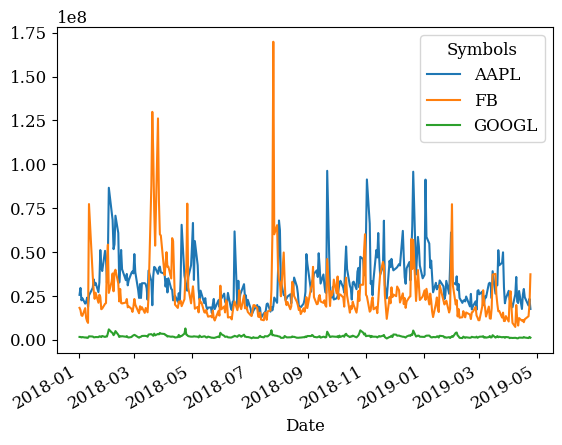

In [35]:
stock['Volume'].plot()
plt.show()

Untuk reset kembali pengaturan font, dapat menggunakan `.rcdefaults()`:

In [36]:
mpl.rcdefaults()

#### Mengatur tulisan pada judul dan label axis

Tulisan pada judul (`title`) dan label axis (`xlabel` dan `ylabel`) dapat diatur agar plot lebih informatif.

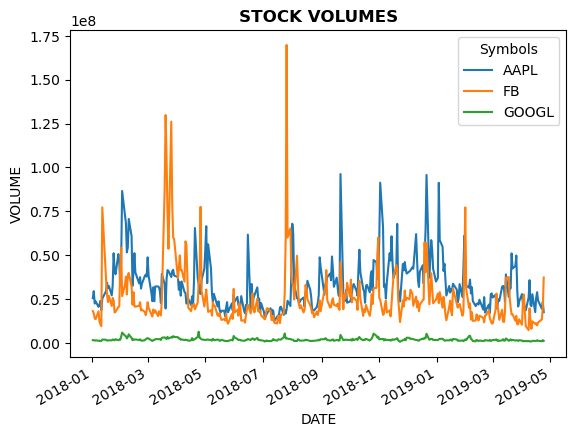

In [37]:
stock['Volume'].plot()

plt.xlabel("DATE")                            # label sumbu x
plt.ylabel("VOLUME")                          # label sumbu y
plt.title("STOCK VOLUMES", fontweight='bold') # judul plot
plt.show()

#### Mengatur label ticks pada axis

Label pada ticks juga dapat diatur melalui axes, diakses melalui `plt.gca()`

In [38]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

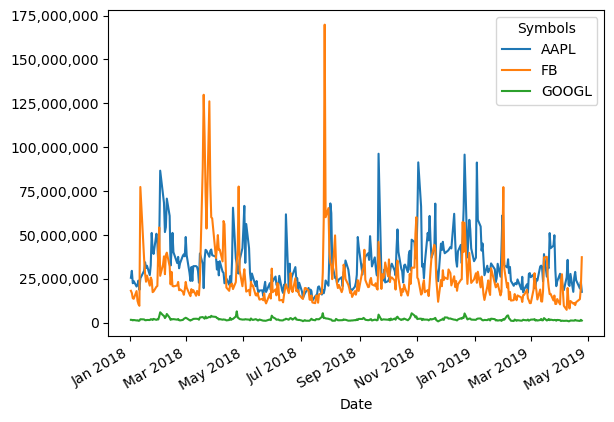

In [39]:
stock['Volume'].plot()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))         # mengubah format tanggal
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) # comma separator untuk angka
plt.show()

#### Mengatur legend

Method `plt.legend` dapat digunakan untuk mengatur peletakan, label, orientasi, dan juga judul pada legenda.

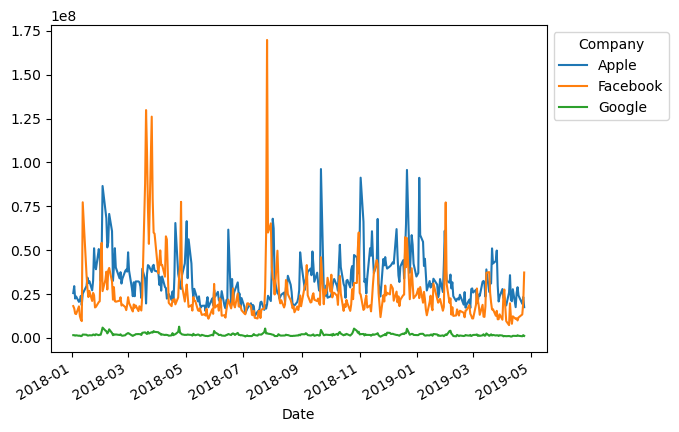

In [40]:
stock['Volume'].plot()

plt.legend(
    bbox_to_anchor=(1, 1),                      # bounding box: kanan, atas
    loc='upper left',                           # lokasi tumpu dari kotak legenda
    labels=['Apple', 'Facebook', 'Google'],     # mengubah label pada legenda
    title="Company")                            # judul legenda
plt.show()

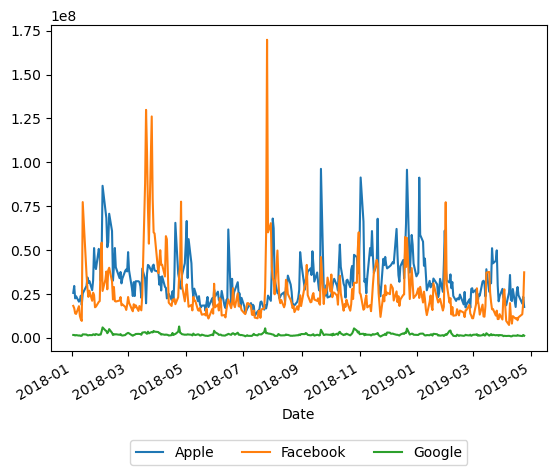

In [41]:
stock['Volume'].plot()

plt.legend(
    bbox_to_anchor=(0.5, -0.25),            # bounding box: tengah, bawah
    loc='upper center',                     # lokasi tumpu dari kotak legenda
    labels=['Apple', 'Facebook', 'Google'], # mengubah label pada legenda
    ncol=3)                                 # orientasi legenda disusun menyamping
plt.show()